In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import numpy as np
import matplotlib.pyplot as plt



def create_circuit():
    qreg_q = QuantumRegister(4, 'q')
    creg_c = ClassicalRegister(4, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)
    for I in range(L):
        circuit.rx(theta[2*I][0], qreg_q[0])
        circuit.rx(theta[2*I][1], qreg_q[1])
        circuit.rx(theta[2*I][2], qreg_q[2])
        circuit.rx(theta[2*I][3], qreg_q[3])
        circuit.rz(theta[2*I+1][0], qreg_q[0])
        circuit.rz(theta[2*I+1][1], qreg_q[1])
        circuit.rz(theta[2*I+1][2], qreg_q[2])
        circuit.rz(theta[2*I+1][3], qreg_q[3])
        circuit.cz(qreg_q[0], qreg_q[1])
        circuit.cz(qreg_q[0], qreg_q[2])
        circuit.cz(qreg_q[0], qreg_q[3])
        circuit.cz(qreg_q[1], qreg_q[2])
        circuit.cz(qreg_q[1], qreg_q[3])
        circuit.cz(qreg_q[2], qreg_q[3])
        circuit.barrier(qreg_q[0])
        circuit.barrier(qreg_q[0])
        circuit.barrier(qreg_q[0])
        circuit.barrier(qreg_q[1])
    return circuit


# randomly assign phi
rndvec = []
for i in range(16):
    x=np.random.uniform(-1,1)+1j*np.random.uniform(-1,1)
    y=np.random.uniform(-1,1)+1j*np.random.uniform(-1,1)
    rndvec.append(x+1j*y)
phi = rndvec/np.linalg.norm(rndvec)


epsilon = [[],[],[],[],[]]


backend_sim = Aer.get_backend('statevector_simulator')

# stepsize for calculating gradients
step = np.pi/2000


for L in range(1,6):
    
    # randomly assigning theta
    theta = []
    for I in range(2*L):
        theta.append(np.random.uniform(0,2*np.pi,4))
    
    gradients = np.zeros(np.shape(theta))
    lrate = 1/(2*L-1)
    
    # optimization
    for iteration in range(1500):
        if iteration in [50, 100, 300, 600, 900, 1200]:
            lrate = lrate/2
        circ = create_circuit()
        job = execute(circ, backend_sim)
        psi = job.result().get_statevector(circ)
        epsilon[L-1].append(np.linalg.norm(phi-psi))
        
        # calculating gradients
        for l in range(2*L):
            for qbit in range(4):
                theta[l][qbit] += step
                tcirc = create_circuit()
                job = execute(tcirc, backend_sim)
                tpsi = job.result().get_statevector(tcirc)
                theta[l][qbit] -= step
                gradients[l][qbit] = (np.linalg.norm(phi-tpsi)-epsilon[L-1][-1])/step
        
        theta -= lrate*gradients
        print(L, iteration, epsilon[L-1][-1])
        


1 0 1.2944115016755406
1 1 1.2552003754949452
1 2 1.219003354100849
1 3 1.1865404099412213
1 4 1.1581052446261655
1 5 1.133582559650383
1 6 1.1125655225452336
1 7 1.0945120798903456
1 8 1.0788767352119661
1 9 1.065187597138184
1 10 1.0530721717545404
1 11 1.042250829409106
1 12 1.0325166531540342
1 13 1.0237138316931271
1 14 1.0157202631401119
1 15 1.0084357562337338
1 16 1.0017750768089457
1 17 0.9956643734552758
1 18 0.9900395608082442
1 19 0.9848455903107481
1 20 0.9800359407195752
1 21 0.9755719951926509
1 22 0.9714222022950938
1 23 0.9675610512213818
1 24 0.9639679503207299
1 25 0.9606261084792505
1 26 0.9575215028303676
1 27 0.9546419893637302
1 28 0.9519765852317308
1 29 0.9495149282260672
1 30 0.9472469020402341
1 31 0.9451624055266717
1 32 0.9432512391321565
1 33 0.9415030806428178
1 34 0.9399075239576092
1 35 0.9384541577628951
1 36 0.9371326649162004
1 37 0.935932927520618
1 38 0.9348451267147727
1 39 0.9338598298705166
1 40 0.9329680610256648
1 41 0.9321613528997014
1 42 0.

1 336 0.9215180523801608
1 337 0.9215138899827331
1 338 0.9215097347835691
1 339 0.921505586784487
1 340 0.921501445987255
1 341 0.9214973123935915
1 342 0.9214931860051645
1 343 0.9214890668235918
1 344 0.9214849548504404
1 345 0.921480850087226
1 346 0.9214767525354142
1 347 0.9214726621964185
1 348 0.9214685790716016
1 349 0.9214645031622739
1 350 0.9214604344696947
1 351 0.921456372995071
1 352 0.9214523187395576
1 353 0.9214482717042569
1 354 0.9214442318902193
1 355 0.9214401992984421
1 356 0.9214361739298702
1 357 0.9214321557853954
1 358 0.9214281448658566
1 359 0.9214241411720393
1 360 0.9214201447046759
1 361 0.9214161554644454
1 362 0.9214121734519731
1 363 0.9214081986678312
1 364 0.921404231112537
1 365 0.9214002707865551
1 366 0.9213963176902953
1 367 0.9213923718241142
1 368 0.9213884331883133
1 369 0.9213845017831405
1 370 0.921380577608789
1 371 0.9213766606653979
1 372 0.9213727509530518
1 373 0.9213688484717805
1 374 0.9213649532215592
1 375 0.9213610652023091
1 376 

1 667 0.9205885607719447
1 668 0.9205874804588716
1 669 0.9205864015587467
1 670 0.9205853240703282
1 671 0.9205842479923736
1 672 0.9205831733236401
1 673 0.9205821000628837
1 674 0.92058102820886
1 675 0.9205799577603238
1 676 0.9205788887160291
1 677 0.9205778210747295
1 678 0.9205767548351779
1 679 0.9205756899961259
1 680 0.9205746265563255
1 681 0.9205735645145272
1 682 0.920572503869481
1 683 0.9205714446199366
1 684 0.9205703867646428
1 685 0.9205693303023477
1 686 0.9205682752317988
1 687 0.9205672215517434
1 688 0.9205661692609276
1 689 0.9205651183580972
1 690 0.9205640688419972
1 691 0.9205630207113722
1 692 0.920561973964966
1 693 0.9205609286015222
1 694 0.9205598846197833
1 695 0.9205588420184918
1 696 0.9205578007963889
1 697 0.920556760952216
1 698 0.9205557224847134
1 699 0.9205546853926211
1 700 0.9205536496746786
1 701 0.9205526153296245
1 702 0.920551582356197
1 703 0.9205505507531344
1 704 0.9205495205191735
1 705 0.9205484916530514
1 706 0.9205474641535041
1 707 

1 998 0.9203352040970274
1 999 0.9203348378722056
1 1000 0.9203344719109309
1 1001 0.9203341062130478
1 1002 0.9203337407784005
1 1003 0.9203333756068338
1 1004 0.920333010698192
1 1005 0.9203326460523196
1 1006 0.920332281669061
1 1007 0.920331917548261
1 1008 0.9203315536897642
1 1009 0.920331190093415
1 1010 0.9203308267590584
1 1011 0.9203304636865388
1 1012 0.9203301008757012
1 1013 0.9203297383263903
1 1014 0.9203293760384509
1 1015 0.9203290140117277
1 1016 0.9203286522460661
1 1017 0.9203282907413105
1 1018 0.9203279294973059
1 1019 0.9203275685138977
1 1020 0.9203272077909307
1 1021 0.9203268473282498
1 1022 0.9203264871257002
1 1023 0.9203261271831272
1 1024 0.9203257675003759
1 1025 0.9203254080772915
1 1026 0.9203250489137191
1 1027 0.9203246900095041
1 1028 0.920324331364492
1 1029 0.9203239729785279
1 1030 0.9203236148514572
1 1031 0.9203232569831256
1 1032 0.9203228993733783
1 1033 0.9203225420220608
1 1034 0.9203221849290188
1 1035 0.9203218280940979
1 1036 0.9203214715

1 1317 0.9202482659481132
1 1318 0.9202481145751276
1 1319 0.9202479632582474
1 1320 0.9202478119974542
1 1321 0.9202476607927303
1 1322 0.9202475096440577
1 1323 0.9202473585514179
1 1324 0.9202472075147934
1 1325 0.920247056534166
1 1326 0.9202469056095176
1 1327 0.9202467547408304
1 1328 0.9202466039280863
1 1329 0.9202464531712672
1 1330 0.9202463024703553
1 1331 0.9202461518253325
1 1332 0.9202460012361809
1 1333 0.9202458507028825
1 1334 0.9202457002254192
1 1335 0.920245549803773
1 1336 0.9202453994379262
1 1337 0.9202452491278605
1 1338 0.9202450988735582
1 1339 0.9202449486750012
1 1340 0.9202447985321714
1 1341 0.9202446484450512
1 1342 0.9202444984136224
1 1343 0.9202443484378673
1 1344 0.9202441985177675
1 1345 0.9202440486533057
1 1346 0.9202438988444632
1 1347 0.9202437490912225
1 1348 0.9202435993935656
1 1349 0.9202434497514748
1 1350 0.9202433001649318
1 1351 0.9202431506339188
1 1352 0.920243001158418
1 1353 0.9202428517384112
1 1354 0.920242702373881
1 1355 0.9202425

2 143 0.48142665863497036
2 144 0.4813917713920224
2 145 0.48135731692754014
2 146 0.481323286994092
2 147 0.48128967353252466
2 148 0.48125646866719374
2 149 0.48122366470132394
2 150 0.48119125411249064
2 151 0.4811592295482255
2 152 0.48112758382173637
2 153 0.4810963099077446
2 154 0.48106540093843264
2 155 0.48103485019949954
2 156 0.4810046511263236
2 157 0.4809747973002265
2 158 0.48094528244483875
2 159 0.4809161004225605
2 160 0.4808872452311193
2 161 0.48085871100021926
2 162 0.4808304919882786
2 163 0.4808025825792564
2 164 0.4807749772795625
2 165 0.4807476707150511
2 166 0.4807206576280933
2 167 0.4806939328747303
2 168 0.4806674914218984
2 169 0.48064132834473206
2 170 0.48061543882393604
2 171 0.48058981814322743
2 172 0.48056446168684774
2 173 0.48053936493713845
2 174 0.480514523472182
2 175 0.4804899329635052
2 176 0.48046558917384263
2 177 0.4804414879549601
2 178 0.48041762524553394
2 179 0.48039399706908775
2 180 0.48037059953198197
2 181 0.48034742882145703
2 182 

2 466 0.477842237465213
2 467 0.47783865970325673
2 468 0.47783508898003857
2 469 0.47783152527650113
2 470 0.47782796857368315
2 471 0.4778244188527177
2 472 0.4778208760948321
2 473 0.47781734028134626
2 474 0.4778138113936737
2 475 0.4778102894133186
2 476 0.4778067743218767
2 477 0.47780326610103396
2 478 0.4777997647325658
2 479 0.47779627019833687
2 480 0.47779278248029916
2 481 0.47778930156049293
2 482 0.4777858274210448
2 483 0.47778236004416746
2 484 0.47777889941215906
2 485 0.4777754455074025
2 486 0.47777199831236455
2 487 0.47776855780959543
2 488 0.4777651239817283
2 489 0.4777616968114781
2 490 0.47775827628164125
2 491 0.477754862375095
2 492 0.4777514550747967
2 493 0.47774805436378354
2 494 0.477744660225171
2 495 0.47774127264215344
2 496 0.4777378915980028
2 497 0.4777345170760676
2 498 0.47773114905977354
2 499 0.4777277875326216
2 500 0.4777244324781886
2 501 0.47772108388012563
2 502 0.4777177417221582
2 503 0.477714405988085
2 504 0.47771107666177837
2 505 0.47

2 789 0.4771780739233316
2 790 0.47717690535920515
2 791 0.4771757378459653
2 792 0.47717457138256364
2 793 0.477173405967953
2 794 0.47717224160108795
2 795 0.4771710782809242
2 796 0.4771699160064186
2 797 0.47716875477652954
2 798 0.4771675945902166
2 799 0.47716643544644094
2 800 0.47716527734416464
2 801 0.47716412028235144
2 802 0.47716296425996624
2 803 0.47716180927597535
2 804 0.4771606553293462
2 805 0.47715950241904775
2 806 0.4771583505440499
2 807 0.4771571997033245
2 808 0.477156049895844
2 809 0.4771549011205824
2 810 0.47715375337651517
2 811 0.4771526066626189
2 812 0.4771514609778713
2 813 0.4771503163212518
2 814 0.4771491726917408
2 815 0.47714803008831996
2 816 0.4771468885099721
2 817 0.47714574795568165
2 818 0.47714460842443424
2 819 0.47714346991521656
2 820 0.4771423324270166
2 821 0.47714119595882376
2 822 0.4771400605096285
2 823 0.4771389260784227
2 824 0.47713779266419937
2 825 0.47713666026595286
2 826 0.47713552888267885
2 827 0.47713439851337386
2 828 0

2 1108 0.4769494129713567
2 1109 0.476948930520582
2 1110 0.4769484482828874
2 1111 0.47694796625817115
2 1112 0.4769474844463309
2 1113 0.476947002847265
2 1114 0.4769465214608714
2 1115 0.4769460402870483
2 1116 0.4769455593256939
2 1117 0.47694507857670654
2 1118 0.47694459803998457
2 1119 0.47694411771542633
2 1120 0.4769436376029303
2 1121 0.47694315770239504
2 1122 0.476942678013719
2 1123 0.47694219853680064
2 1124 0.4769417192715389
2 1125 0.4769412402178324
2 1126 0.4769407613755799
2 1127 0.4769402827446803
2 1128 0.47693980432503236
2 1129 0.476939326116535
2 1130 0.47693884811908743
2 1131 0.4769383703325883
2 1132 0.47693789275693704
2 1133 0.4769374153920328
2 1134 0.4769369382377746
2 1135 0.47693646129406186
2 1136 0.47693598456079384
2 1137 0.47693550803787
2 1138 0.4769350317251894
2 1139 0.4769345556226518
2 1140 0.4769340797301568
2 1141 0.47693360404760377
2 1142 0.47693312857489245
2 1143 0.4769326533119227
2 1144 0.47693217825859385
2 1145 0.4769317034148062
2 11

2 1419 0.476856372551724
2 1420 0.47685615178622
2 1421 0.47685593106911534
2 1422 0.47685571040039826
2 1423 0.47685548978005743
2 1424 0.47685526920808136
2 1425 0.47685504868445866
2 1426 0.47685482820917763
2 1427 0.476854607782227
2 1428 0.4768543874035954
2 1429 0.4768541670732712
2 1430 0.47685394679124293
2 1431 0.4768537265574993
2 1432 0.4768535063720288
2 1433 0.47685328623481993
2 1434 0.47685306614586126
2 1435 0.4768528461051415
2 1436 0.47685262611264906
2 1437 0.4768524061683725
2 1438 0.4768521862723005
2 1439 0.47685196642442146
2 1440 0.47685174662472424
2 1441 0.4768515268731972
2 1442 0.47685130716982904
2 1443 0.47685108751460825
2 1444 0.4768508679075235
2 1445 0.47685064834856344
2 1446 0.4768504288377164
2 1447 0.47685020937497125
2 1448 0.4768499899603165
2 1449 0.4768497705937406
2 1450 0.4768495512752325
2 1451 0.4768493320047806
2 1452 0.4768491127823735
2 1453 0.47684889360799976
2 1454 0.4768486744816483
2 1455 0.47684845540330745
2 1456 0.476848236372965

3 248 0.399172775315409
3 249 0.3964876341128501
3 250 0.3938264074847198
3 251 0.3911899689409508
3 252 0.3885791564065162
3 253 0.38599477091653833
3 254 0.38343757546675183
3 255 0.3809082940228753
3 256 0.37840761069103146
3 257 0.3759361690498998
3 258 0.3734945716438436
3 259 0.3710833796348722
3 260 0.3687031126099467
3 261 0.36635424853887005
3 262 0.36403722387682425
3 263 0.36175243380457434
3 264 0.35950023259840647
3 265 0.3572809341210822
3 266 0.3550948124244299
3 267 0.35294210245371704
3 268 0.3508230008435844
3 269 0.34873766679514584
3 270 0.3466862230238211
3 271 0.34466875676756753
3 272 0.34268532084543274
3 273 0.3407359347566999
3 274 0.33882058581138147
3 275 0.33693923028338113
3 276 0.3350917945782972
3 277 0.3332781764085465
3 278 0.331498245969237
3 279 0.3297518471090033
3 280 0.3280387984908096
3 281 0.3263588947385085
3 282 0.32471190756570756
3 283 0.32309758688423634
3 284 0.3215156618901886
3 285 0.31996584212615536
3 286 0.31844781851883897
3 287 0.31

3 570 0.24590442268131854
3 571 0.2458115955644213
3 572 0.24571903792823466
3 573 0.24562674894707967
3 574 0.24553472780387503
3 575 0.24544297368984686
3 576 0.24535148580424734
3 577 0.2452602633540815
3 578 0.24516930555384184
3 579 0.24507861162525124
3 580 0.24498818079701368
3 581 0.24489801230457098
3 582 0.24480810538986894
3 583 0.2447184593011292
3 584 0.24462907329262826
3 585 0.2445399466244832
3 586 0.24445107856244497
3 587 0.2443624683776969
3 588 0.24427411534666096
3 589 0.244186018750808
3 590 0.24409817787647636
3 591 0.24401059201469538
3 592 0.24392326046101392
3 593 0.2438361825153358
3 594 0.24374935748175966
3 595 0.24366278466842486
3 596 0.24357646338736172
3 597 0.243490392954348
3 598 0.24340457268876894
3 599 0.24331900191348313
3 600 0.24323367995469314
3 601 0.24319112760719877
3 602 0.24314863713823234
3 603 0.2431062084669032
3 604 0.24306384151207325
3 605 0.24302153619244274
3 606 0.2429792924266161
3 607 0.24293711013315492
3 608 0.2428949892306181

3 889 0.23320677746484159
3 890 0.23317898215930793
3 891 0.23315122779696656
3 892 0.2331235143139953
3 893 0.23309584164664524
3 894 0.23306820973124187
3 895 0.23304061850418373
3 896 0.2330130679019438
3 897 0.23298555786106903
3 898 0.2329580883181804
3 899 0.23293065920997302
3 900 0.23290327047321663
3 901 0.2328895937599296
3 902 0.23287592711023758
3 903 0.2328622705163551
3 904 0.23284862397049136
3 905 0.23283498746485226
3 906 0.23282136099164022
3 907 0.2328077445430559
3 908 0.23279413811129807
3 909 0.23278054168856485
3 910 0.23276695526705465
3 911 0.2327533788389657
3 912 0.23273981239649758
3 913 0.2327262559318503
3 914 0.23271270943722655
3 915 0.23269917290483005
3 916 0.2326856463268673
3 917 0.2326721296955473
3 918 0.23265862300308165
3 919 0.23264512624168487
3 920 0.23263163940357479
3 921 0.23261816248097245
3 922 0.2326046954661026
3 923 0.23259123835119322
3 924 0.23257779112847632
3 925 0.23256435379018758
3 926 0.23255092632856691
3 927 0.232537508735857

3 1201 0.22921263450193652
3 1202 0.2292071412837579
3 1203 0.22920165004387394
3 1204 0.2291961607814826
3 1205 0.22919067349578198
3 1206 0.22918518818597008
3 1207 0.22917970485124503
3 1208 0.22917422349080518
3 1209 0.229168744103849
3 1210 0.22916326668957465
3 1211 0.22915779124718122
3 1212 0.229152317775867
3 1213 0.2291468462748314
3 1214 0.2291413767432731
3 1215 0.22913590918039145
3 1216 0.22913044358538603
3 1217 0.22912497995745607
3 1218 0.2291195182958017
3 1219 0.22911405859962253
3 1220 0.2291086008681189
3 1221 0.229103145100491
3 1222 0.22909769129593963
3 1223 0.2290922394536652
3 1224 0.2290867895728689
3 1225 0.22908134165275174
3 1226 0.22907589569251527
3 1227 0.22907045169136098
3 1228 0.22906500964849086
3 1229 0.22905956956310686
3 1230 0.22905413143441128
3 1231 0.2290486952616068
3 1232 0.2290432610438961
3 1233 0.22903782878048223
3 1234 0.22903239847056836
3 1235 0.22902697011335824
3 1236 0.2290215437080555
3 1237 0.22901611925386411
3 1238 0.229010696

4 10 1.1408396136606682
4 11 1.1215237909099864
4 12 1.1018524604717228
4 13 1.0818604610632427
4 14 1.0615927674216847
4 15 1.0411032374148292
4 16 1.0204536213939066
4 17 0.9997126643606233
4 18 0.9789551451862216
4 19 0.9582607396385281
4 20 0.9377126462997223
4 21 0.917395964223228
4 22 0.8973958529784388
4 23 0.8777955386909505
4 24 0.8586742544548911
4 25 0.8401052202531453
4 26 0.8221537754564904
4 27 0.804875774804956
4 28 0.7883163456891876
4 29 0.7725090809822828
4 30 0.7574757096896646
4 31 0.7432262508738936
4 32 0.7297596192281824
4 33 0.7170646180011258
4 34 0.7051212306237252
4 35 0.6939021087712145
4 36 0.6833741522745603
4 37 0.6735000840965079
4 38 0.6642399390236141
4 39 0.6555524046796599
4 40 0.6473959748324898
4 41 0.6397298951609027
4 42 0.6325148988791197
4 43 0.6257137429363225
4 44 0.6192915647018045
4 45 0.6132160844273752
4 46 0.6074576809772398
4 47 0.6019893680880127
4 48 0.5967866965148891
4 49 0.5918276044901006
4 50 0.5870922354917347
4 51 0.58481496563

4 339 0.37758142900956243
4 340 0.3771905440477411
4 341 0.37679899333966627
4 342 0.37640677860542815
4 343 0.376013901642574
4 344 0.3756203643266564
4 345 0.3752261686117664
4 346 0.37483131653106094
4 347 0.3744358101972766
4 348 0.37403965180323434
4 349 0.37364284362233
4 350 0.37324538800901613
4 351 0.37284728739927137
4 352 0.3724485443110545
4 353 0.3720491613447495
4 354 0.37164914118359726
4 355 0.37124848659410853
4 356 0.3708472004264726
4 357 0.3704452856149431
4 358 0.3700427451782152
4 359 0.36963958221978455
4 360 0.3692357999282939
4 361 0.36883140157786265
4 362 0.36842639052840165
4 363 0.36802077022591073
4 364 0.3676145442027614
4 365 0.367207716077963
4 366 0.3668002895574091
4 367 0.36639226843410966
4 368 0.3659836565884044
4 369 0.36557445798815763
4 370 0.36516467668893515
4 371 0.3647543168341622
4 372 0.36434338265526406
4 373 0.3639318784717849
4 374 0.3635198086914877
4 375 0.36310717781043556
4 376 0.36269399041305184
4 377 0.36228025117215845
4 378 0.3

4 663 0.2597967264845133
4 664 0.25963376632141977
4 665 0.25947099089953357
4 666 0.25930839988635057
4 667 0.2591459929482425
4 668 0.25898376975049536
4 669 0.2588217299573504
4 670 0.2586598732320417
4 671 0.25849819923683587
4 672 0.25833670763307076
4 673 0.2581753980811941
4 674 0.2580142702408012
4 675 0.25785332377067377
4 676 0.2576925583288174
4 677 0.25753197357249885
4 678 0.2573715691582846
4 679 0.25721134474207646
4 680 0.25705129997914977
4 681 0.2568914345241892
4 682 0.25673174803132603
4 683 0.2565722401541735
4 684 0.25641291054586324
4 685 0.25625375885908136
4 686 0.256094784746103
4 687 0.25593598785882843
4 688 0.25577736784881744
4 689 0.2556189243673243
4 690 0.25546065706533244
4 691 0.2553025655935881
4 692 0.2551446496026346
4 693 0.25498690874284624
4 694 0.25482934266446156
4 695 0.25467195101761564
4 696 0.2545147334523748
4 697 0.2543576896187674
4 698 0.2542008191668175
4 699 0.2540441217465754
4 700 0.25388759700815244
4 701 0.253731244601748
4 702 0

4 983 0.22046549614406927
4 984 0.22040440856556875
4 985 0.22034335251778356
4 986 0.220282327998736
4 987 0.2202213350064997
4 988 0.22016037353919987
4 989 0.2200994435950126
4 990 0.22003854517216465
4 991 0.2199776782689331
4 992 0.21991684288364466
4 993 0.21985603901467557
4 994 0.2197952666604517
4 995 0.21973452581944708
4 996 0.21967381649018466
4 997 0.21961313867123536
4 998 0.21955249236121757
4 999 0.21949187755879715
4 1000 0.21943129426268698
4 1001 0.21937074247164684
4 1002 0.2193102221844823
4 1003 0.21924973340004517
4 1004 0.21918927611723274
4 1005 0.21912885033498752
4 1006 0.21906845605229663
4 1007 0.21900809326819184
4 1008 0.21894776198174928
4 1009 0.21888746219208835
4 1010 0.21882719389837213
4 1011 0.21876695709980662
4 1012 0.2187067517956405
4 1013 0.218646577985165
4 1014 0.21858643566771296
4 1015 0.21852632484265885
4 1016 0.2184662455094187
4 1017 0.21840619766744904
4 1018 0.2183461813162475
4 1019 0.21828619645535105
4 1020 0.21822624308433694
4 1

4 1291 0.20551298034609206
4 1292 0.20548658254439164
4 1293 0.20546019268554228
4 1294 0.2054338107696096
4 1295 0.205407436796658
4 1296 0.20538107076675005
4 1297 0.2053547126799467
4 1298 0.20532836253630776
4 1299 0.20530202033589134
4 1300 0.20527568607875374
4 1301 0.2052493597649497
4 1302 0.2052230413945329
4 1303 0.20519673096755484
4 1304 0.20517042848406575
4 1305 0.20514413394411415
4 1306 0.20511784734774738
4 1307 0.2050915686950104
4 1308 0.2050652979859472
4 1309 0.20503903522060007
4 1310 0.20501278039900941
4 1311 0.2049865335212143
4 1312 0.20496029458725198
4 1313 0.20493406359715835
4 1314 0.20490784055096742
4 1315 0.2048816254487115
4 1316 0.20485541829042164
4 1317 0.20482921907612678
4 1318 0.20480302780585452
4 1319 0.20477684447963077
4 1320 0.20475066909747963
4 1321 0.20472450165942382
4 1322 0.20469834216548388
4 1323 0.20467219061567923
4 1324 0.20464604701002725
4 1325 0.20461991134854368
4 1326 0.2045937836312428
4 1327 0.20456766385813704
4 1328 0.204

5 109 0.32073194482637146
5 110 0.31936023636846705
5 111 0.3179944644760558
5 112 0.31663464896903326
5 113 0.31528080800225133
5 114 0.3139329580333377
5 115 0.31259111379430493
5 116 0.31125528826689264
5 117 0.30992549266161157
5 118 0.30860173640044886
5 119 0.3072840271031975
5 120 0.3059723705773817
5 121 0.30466677081173327
5 122 0.30336722997318066
5 123 0.30207374840729734
5 124 0.30078632464216287
5 125 0.29950495539557503
5 126 0.29822963558555327
5 127 0.2969603583440623
5 128 0.2956971150338826
5 129 0.2944398952685535
5 130 0.29318868693529976
5 131 0.2919434762208592
5 132 0.29070424764011316
5 133 0.28947098406742905
5 134 0.2882436667706111
5 135 0.2870222754473506
5 136 0.28580678826408024
5 137 0.28459718189710376
5 138 0.2833934315759008
5 139 0.2821955111284848
5 140 0.28100339302869315
5 141 0.2798170484452908
5 142 0.27863644729276377
5 143 0.27746155828367797
5 144 0.27629234898247745
5 145 0.27512878586059847
5 146 0.27397083435276876
5 147 0.2728184589143698


5 428 0.11876079164891995
5 429 0.11858180829276695
5 430 0.11840327545431688
5 431 0.11822519057354709
5 432 0.11804755111075621
5 433 0.11787035454654465
5 434 0.1176935983817916
5 435 0.11751728013763087
5 436 0.11734139735542042
5 437 0.11716594759671112
5 438 0.11699092844321067
5 439 0.1168163374967458
5 440 0.1166421723792212
5 441 0.11646843073257435
5 442 0.11629511021872971
5 443 0.11612220851954813
5 444 0.11594972333677535
5 445 0.11577765239198716
5 446 0.11560599342653076
5 447 0.11543474420146731
5 448 0.11526390249750784
5 449 0.11509346611495085
5 450 0.11492343287361398
5 451 0.11475380061276674
5 452 0.11458456719106032
5 453 0.11441573048645322
5 454 0.11424728839613886
5 455 0.11407923883646785
5 456 0.11391157974287079
5 457 0.11374430906977806
5 458 0.11357742479053874
5 459 0.11341092489733709
5 460 0.113244807401109
5 461 0.11307907033145473
5 462 0.11291371173655247
5 463 0.11274872968306955
5 464 0.11258412225607184
5 465 0.11241988755893298
5 466 0.112256023

5 745 0.08465122176216601
5 746 0.0845971462751351
5 747 0.08454312695984027
5 748 0.08448916379817518
5 749 0.08443525677208803
5 750 0.08438140586358026
5 751 0.08432761105470592
5 752 0.08427387232756961
5 753 0.0842201896643255
5 754 0.08416656304717571
5 755 0.08411299245837012
5 756 0.0840594778802032
5 757 0.08400601929501438
5 758 0.08395261668518662
5 759 0.08389927003314393
5 760 0.0838459793213516
5 761 0.08379274453231411
5 762 0.08373956564857378
5 763 0.08368644265271029
5 764 0.08363337552733852
5 765 0.08358036425510817
5 766 0.0835274088187023
5 767 0.08347450920083564
5 768 0.08342166538425332
5 769 0.08336887735173121
5 770 0.08331614508607292
5 771 0.08326346857010926
5 772 0.08321084778669724
5 773 0.08315828271871885
5 774 0.08310577334907977
5 775 0.08305331966070802
5 776 0.08300092163655316
5 777 0.08294857925958542
5 778 0.08289629251279344
5 779 0.08284406137918425
5 780 0.0827918858417814
5 781 0.08273976588362465
5 782 0.08268770148776824
5 783 0.0826356926

5 1061 0.0734296215548574
5 1062 0.07340893828681294
5 1063 0.07338826785123596
5 1064 0.07336761024450678
5 1065 0.07334696546299957
5 1066 0.07332633350308236
5 1067 0.07330571436111707
5 1068 0.07328510803345906
5 1069 0.07326451451645756
5 1070 0.07324393380645552
5 1071 0.07322336589978987
5 1072 0.07320281079279117
5 1073 0.0731822684817834
5 1074 0.0731617389630847
5 1075 0.07314122223300669
5 1076 0.073120718287855
5 1077 0.0731002271239285
5 1078 0.07307974873752035
5 1079 0.07305928312491711
5 1080 0.07303883028239917
5 1081 0.07301839020624039
5 1082 0.07299796289270895
5 1083 0.07297754833806615
5 1084 0.07295714653856707
5 1085 0.07293675749046095
5 1086 0.07291638118999005
5 1087 0.07289601763339124
5 1088 0.07287566681689422
5 1089 0.0728553287367228
5 1090 0.07283500338909486
5 1091 0.07281469077022107
5 1092 0.07279439087630653
5 1093 0.07277410370354997
5 1094 0.07275382924814341
5 1095 0.07273356750627302
5 1096 0.0727133184741184
5 1097 0.0726930821478531
5 1098 0.0

5 1367 0.06913675207412574
5 1368 0.06912778697012274
5 1369 0.06911882483447332
5 1370 0.06910986566655486
5 1371 0.06910090946574392
5 1372 0.06909195623141681
5 1373 0.06908300596294951
5 1374 0.06907405865971752
5 1375 0.06906511432109644
5 1376 0.0690561729464609
5 1377 0.06904723453518558
5 1378 0.0690382990866446
5 1379 0.0690293666002119
5 1380 0.06902043707526082
5 1381 0.06901151051116461
5 1382 0.06900258690729627
5 1383 0.06899366626302779
5 1384 0.06898474857773157
5 1385 0.06897583385077911
5 1386 0.06896692208154187
5 1387 0.06895801326939084
5 1388 0.06894910741369686
5 1389 0.06894020451383005
5 1390 0.06893130456916029
5 1391 0.06892240757905743
5 1392 0.06891351354289042
5 1393 0.0689046224600284
5 1394 0.06889573432983989
5 1395 0.06888684915169302
5 1396 0.06887796692495549
5 1397 0.06886908764899498
5 1398 0.06886021132317853
5 1399 0.0688513379468731
5 1400 0.0688424675194448
5 1401 0.06883360004026011
5 1402 0.06882473550868455
5 1403 0.06881587392408363
5 1404 

<Figure size 640x480 with 1 Axes>

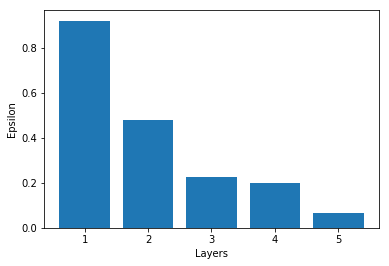

In [2]:
plt.bar(['1','2','3','4','5'],np.transpose(epsilon)[-1])
plt.xlabel("Layers")
plt.ylabel("Epsilon")
plt.show()